In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
fake = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/Fake.csv')

In [ ]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

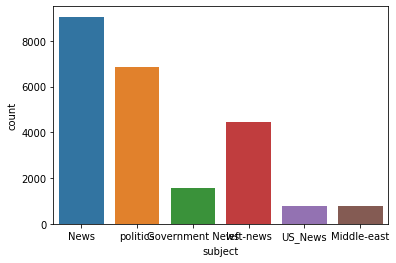

In [ ]:
sns.countplot(x = 'subject',data=fake)

In [ ]:
text = ' '.join(fake['text'].tolist())

In [ ]:
' '.join(['this', 'is', 'a', 'data'])

'this is a data'

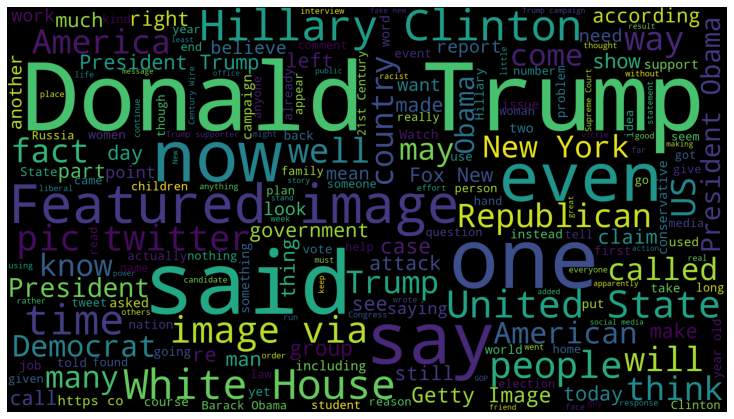

In [ ]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
real = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/True.csv')

In [ ]:
text = ' '.join(real['text'].tolist())

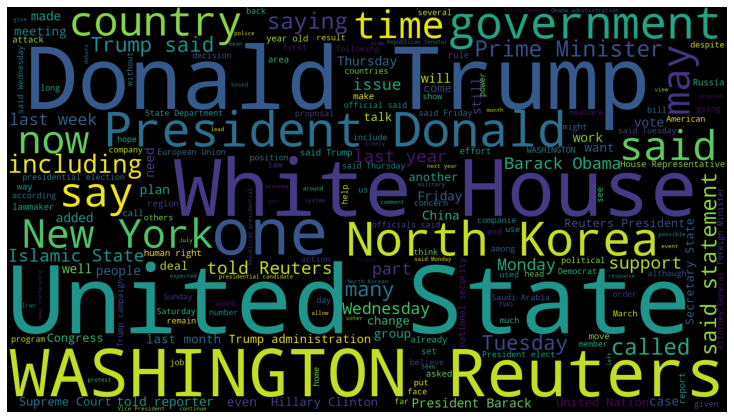

In [ ]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
real.sample(5)

,title,text,subject,date
3679,U.S. senator insists special counsel won't der...,WASHINGTON (Reuters) - A senior U.S. senator s...,politicsNews,"May 19, 2017"
20755,U.S. Navy to transport damaged destroyer from ...,SINGAPORE (Reuters) - The U.S. Navy plans to t...,worldnews,"September 7, 2017"
5209,Senate confirms Trump's pick Zinke as Interior...,WASHINGTON (Reuters) - The Senate on Wednesday...,politicsNews,"March 1, 2017"
9761,Elections get dirty as adult filmmakers set up...,"SACRAMENTO, Calif. (Reuters) - California poli...",politicsNews,"April 28, 2016"
16852,"Rockets strike downtown Kabul, no casualties r...",KABUL (Reuters) - As many as two rockets lande...,worldnews,"October 21, 2017"


In [ ]:
unknown_publishers = []
for index, row in enumerate(real.text.values):
  try:
    record = row.split('-', maxsplit=1)
    record[1]

    assert(len(record[0])<120)
  except:
    unknown_publishers.append(index)

In [ ]:
len(unknown_publishers)

222

In [ ]:
real.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

In [ ]:
real.iloc[8970]

title      Graphic: Supreme Court roundup
text                                     
subject                      politicsNews
date                       June 16, 2016 
Name: 8970, dtype: object

In [ ]:
real = real.drop(8970, axis=0)

In [ ]:
publisher = []
tmp_text = []

for index, row in enumerate(real.text.values):
  if index in unknown_publishers:
    tmp_text.append(row)
    publisher.append('Unknown')
  
  else:
    record = row.split('-', maxsplit=1)
    publisher.append(record[0].strip())
    tmp_text.append(record[1].strip())

In [ ]:
real['publisher']=publisher
real['text'] = tmp_text

In [ ]:
real.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [ ]:
real.shape

(21416, 5)

In [ ]:
empty_fake_index = [index for index,text in enumerate(fake.text.tolist()) if str(text).strip()==""]

In [ ]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [ ]:
real['text'] = real['title'] + " " + real['text']
fake['text'] = fake['title'] + " " + fake['text']

In [ ]:
real['text'] = real['text'].apply(lambda x: str(x).lower())
fake['text'] = fake['text'].apply(lambda x: str(x).lower())

In [ ]:
real['class'] = 1
fake['class'] = 0

In [ ]:
real.columns

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [ ]:
real = real[['text', 'class']]

In [ ]:
fake = fake[['text', 'class']]

In [ ]:
data = real.append(fake, ignore_index=True)

In [ ]:
data.sample(5)

,text,class
38645,shocking: interviewer shows many americans hav...,0
11315,china says part of hong kong rail station to b...,1
29955,watch this bundy militiaman challenge chris c...,0
26761,"politifact’s scorecards for clinton, kaine ve...",0
24273,trump plans to issue executive order allowing...,0


In [ ]:
# https://github.com/laxmimerit/preprocess_kgptalkie

In [ ]:
!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

     |████████████████████████████████| 10.4 MB 4.5 MB/s 
     |████████████████████████████████| 2.2 MB 31.8 MB/s 
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
     |████████████████████████████████| 12.0 MB 5.4 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
     |████████████████████████████████| 115 kB 5.3 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-733eva5e
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip

In [ ]:
import preprocess_kgptalkie as ps

In [ ]:
data['text'] = data['text'].apply(lambda x: ps.remove_special_chars(x))

In [ ]:
data.head()

,text,class
0,as us budget fight looms republicans flip thei...,1
1,us military to accept transgender recruits on ...,1
2,senior us republican senator let mr mueller do...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge much more...,1


In [ ]:
import gensim

In [ ]:
y = data['class'].values

In [ ]:
X = [d.split() for d in data['text'].tolist()]

In [ ]:
type(X[0])

list

In [ ]:
print(X[0])

['as', 'us', 'budget', 'fight', 'looms', 'republicans', 'flip', 'their', 'fiscal', 'script', 'the', 'head', 'of', 'a', 'conservative', 'republican', 'faction', 'in', 'the', 'us', 'congress', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts', 'called', 'himself', 'a', 'fiscal', 'conservative', 'on', 'sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018', 'in', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'republicans', 'us', 'representative', 'mark', 'meadows', 'speaking', 'on', 'cbs', 'face', 'the', 'nation', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'january', 'when', 'they', 'return', 'from', 'the', 'holidays', 'on', 'wednesday', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', 'other', 'issues',

In [ ]:
DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=X, size=DIM, window=10, min_count=1)

In [ ]:
len(w2v_model.wv.vocab)

231872

In [ ]:
w2v_model.wv['love']

array([-1.670575  , -0.0325884 ,  1.894691  ,  2.680798  , -1.2567289 ,
       -3.431891  , -1.7274638 , -2.2722108 , -0.9093202 , -2.043272  ,
        0.06105006, -0.03203717,  0.01249015,  3.5637417 , -1.2648427 ,
       -2.785139  ,  0.06532537, -1.6420869 , -3.8557758 ,  0.05103995,
        0.5363417 , -0.8017415 , -0.83706856,  0.15561175,  3.1642566 ,
        0.4149853 , -1.814455  , -1.0699347 ,  1.9624897 , -3.1489727 ,
       -2.6505702 , -2.5640333 ,  2.2982645 , -2.1813695 ,  0.39817658,
       -2.4599257 ,  0.688917  ,  0.04410244, -1.138568  , -2.704763  ,
       -1.5993648 ,  3.0779078 , -0.844825  ,  0.03895631,  6.6389914 ,
        1.925466  ,  3.2295015 ,  3.9897716 , -1.6134897 , -0.5368973 ,
        0.7726645 ,  1.2596636 , -0.11584682, -1.2947028 , -0.16632713,
        0.3199351 ,  0.601318  ,  2.0509791 ,  2.1111665 ,  0.3602813 ,
       -2.0945988 , -3.4301405 , -1.4336011 ,  0.16873056,  2.0934129 ,
       -3.2989752 ,  0.7314905 , -6.295748  , -1.651783  ,  0.84

In [ ]:
w2v_model.wv.most_similar('trump')

[('trumps', 0.7340561151504517),
 ('trumpthe', 0.6020545959472656),
 ('trumptrump', 0.5912243127822876),
 ('he', 0.5425447821617126),
 ('trumpit', 0.5409336090087891),
 ('presidentelect', 0.538955807685852),
 ('him', 0.5324275493621826),
 ('presidentelects', 0.5268007516860962),
 ('cruz', 0.5175195932388306),
 ('catcalls', 0.5134533643722534)]

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [ ]:
X = tokenizer.texts_to_sequences(X)

In [ ]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 'that': 7,
 'on': 8,
 'for': 9,
 's': 10,
 'is': 11,
 'he': 12,
 'said': 13,
 'trump': 14,
 'it': 15,
 'with': 16,
 'was': 17,
 'as': 18,
 'his': 19,
 'by': 20,
 'has': 21,
 'be': 22,
 'have': 23,
 'not': 24,
 'from': 25,
 'this': 26,
 'at': 27,
 'are': 28,
 'who': 29,
 'us': 30,
 'an': 31,
 'they': 32,
 'i': 33,
 'but': 34,
 'we': 35,
 'would': 36,
 'president': 37,
 'about': 38,
 'will': 39,
 'their': 40,
 'had': 41,
 'you': 42,
 't': 43,
 'been': 44,
 'were': 45,
 'people': 46,
 'more': 47,
 'or': 48,
 'after': 49,
 'which': 50,
 'she': 51,
 'her': 52,
 'one': 53,
 'if': 54,
 'its': 55,
 'out': 56,
 'all': 57,
 'what': 58,
 'state': 59,
 'when': 60,
 'new': 61,
 'also': 62,
 'up': 63,
 'there': 64,
 'over': 65,
 'no': 66,
 'house': 67,
 'donald': 68,
 'our': 69,
 'states': 70,
 'clinton': 71,
 'obama': 72,
 'government': 73,
 'can': 74,
 'just': 75,
 'him': 76,
 'so': 77,
 'than': 78,
 'republican': 79,
 'other': 80,
 'so

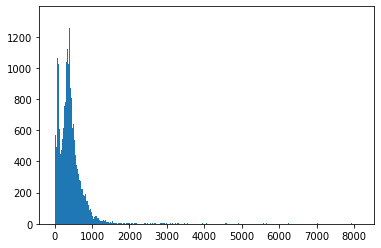

In [ ]:
plt.hist([len(x) for x in X], bins = 700)
plt.show()

In [ ]:
nos = np.array([len(x) for x in X])
len(nos[nos>1000])

1581

In [ ]:
maxlen = 1000
X = pad_sequences(X, maxlen=maxlen)

In [ ]:
len(X[0])

1000

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [ ]:
def get_weight_matrix(model):
  weight_matrix=np.zeros((vocab_size, DIM))

  for word, i in vocab.items():
    weight_matrix[i] = model.wv[word]
  
  return weight_matrix

In [ ]:
embedding_vectors = get_weight_matrix(w2v_model)

In [ ]:
embedding_vectors.shape

(231873, 100)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=DIM, weights = [embedding_vectors], input_length=maxlen, trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         23187300  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 23,304,677
Trainable params: 117,377
Non-trainable params: 23,187,300
_________________________________________________________________


In [ ]:
X_train, X_text, y_train, y_test = train_test_split(X,y)

In [ ]:
model.fit(X_train, y_train, validation_split=0.3, epochs=6)

Epoch 1/6
737/737 [==============================] - 126s 163ms/step - loss: 0.1348 - acc: 0.9519 - val_loss: 0.0928 - val_acc: 0.9667
Epoch 2/6
737/737 [==============================] - 119s 162ms/step - loss: 0.0463 - acc: 0.9848 - val_loss: 0.0323 - val_acc: 0.9889
Epoch 3/6
737/737 [==============================] - 119s 162ms/step - loss: 0.0226 - acc: 0.9933 - val_loss: 0.0265 - val_acc: 0.9914
Epoch 4/6
737/737 [==============================] - 119s 162ms/step - loss: 0.0223 - acc: 0.9926 - val_loss: 0.0325 - val_acc: 0.9896
Epoch 5/6
737/737 [==============================] - 119s 162ms/step - loss: 0.0244 - acc: 0.9920 - val_loss: 0.0306 - val_acc: 0.9912
Epoch 6/6
737/737 [==============================] - 119s 162ms/step - loss: 0.0116 - acc: 0.9965 - val_loss: 0.0270 - val_acc: 0.9911


In [ ]:
y_pred = (model.predict(X_text) >=0.5).astype(int)

In [ ]:
accuracy_score(y_test, y_pred)

0.9911804008908686

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5833
           1       0.99      0.99      0.99      5392

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [ ]:
x = ['this is a news']

In [ ]:
X_text

array([[    0,     0,     0, ...,  1308,     3, 17969],
       [    0,     0,     0, ...,  1320,  2437,   463],
       [    0,     0,     0, ...,     1,  1799,   558],
       ...,
       [   13,   125,  1476, ...,   112,   608,  3065],
       [    0,     0,     0, ...,    10,   551,  2743],
       [    0,     0,     0, ...,     4,  1173,  2186]], dtype=int32)

In [ ]:
x = ["Vladimir Putin and Russia are not the aggressors in this conflict, and that the U.S. orchestrated the 2014 revolution in Ukraine."]
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)

In [ ]:
# print((model.predict(x) >=0.5).astype(int))

l = [(model.predict(x) >=0.5).astype(int)]
if l[0][0]==0:
  print('This is a FAKE News!!!')
else:
  print('This is a REAL News!!!')

This is a FAKE News!!!


In [ ]:
!pip install nbconvert

In [ ]:
!jupyter nbconvert --to html "FND using LSTM and Deep Learning".ipynb

[NbConvertApp] WARNING | pattern 'FND using LSTM and Deep Learning.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_ye